In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings (action= 'ignore')
plt.style.use(['seaborn-bright' , 'dark_background'])

## Data Exploration

In [92]:
data = pd.read_csv("Loan.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [93]:
# data.info()
data['Combined_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data = data.drop(columns= ['ApplicantIncome' , 'CoapplicantIncome' , 'Loan_ID'])
data.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Combined_Income
0,Male,No,0,Graduate,No,NaN,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            601 non-null    object 
 1   Married           611 non-null    object 
 2   Dependents        599 non-null    object 
 3   Education         614 non-null    object 
 4   Self_Employed     582 non-null    object 
 5   LoanAmount        592 non-null    float64
 6   Loan_Amount_Term  600 non-null    float64
 7   Credit_History    564 non-null    float64
 8   Property_Area     614 non-null    object 
 9   Loan_Status       614 non-null    object 
 10  Combined_Income   614 non-null    float64
dtypes: float64(4), object(7)
memory usage: 52.9+ KB


In [95]:
Categorical_columns = ['Gender' , 'Married' , 'Education' , 'Self_Employed' , 'Property_Area' , 'Dependents']
numerical_columns = ['LoanAmount' , 'Loan_Amount_Term' , 'Credit_History' , 'Combined_Income']

### Imputing the Categorical Dataset

In [96]:
from sklearn.impute import SimpleImputer
Cat_Imputer = SimpleImputer(missing_values= np.nan , strategy= 'most_frequent')
data[Categorical_columns] = Cat_Imputer.fit_transform(data[Categorical_columns])

### Imputing the Numerical Dataset

In [97]:
Num_Imputer = SimpleImputer(missing_values= np.nan , strategy = 'mean')
data[numerical_columns] = Num_Imputer.fit_transform(data[numerical_columns])

In [98]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Combined_Income
0,Male,No,0,Graduate,No,146.412162,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,128.000000,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.000000,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.000000,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,141.000000,360.0,1.0,Urban,Y,6000.0


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            614 non-null    object 
 1   Married           614 non-null    object 
 2   Dependents        614 non-null    object 
 3   Education         614 non-null    object 
 4   Self_Employed     614 non-null    object 
 5   LoanAmount        614 non-null    float64
 6   Loan_Amount_Term  614 non-null    float64
 7   Credit_History    614 non-null    float64
 8   Property_Area     614 non-null    object 
 9   Loan_Status       614 non-null    object 
 10  Combined_Income   614 non-null    float64
dtypes: float64(4), object(7)
memory usage: 52.9+ KB


In [100]:
Gender_mapping = {'Male' : '1' , 'Female' : '0'}
data['Gender'] = data['Gender'].map(Gender_mapping) 

Married_mapping = {'Yes' : '1' , 'No' : '0'}
data['Married'] = data['Married'].map(Married_mapping) 

Education_mapping = {'Graduate' : '1' , 'Not Graduate' : '0'}
data['Education'] = data['Education'].map(Education_mapping) 

Self_Employed = {'Yes' : '1' , 'No' : '0'}
data['Self_Employed'] = data['Self_Employed'].map(Self_Employed) 

Area_mapping = {'Urban' : '1' , 'Rural' : '-1' , 'Semiurban' : '0'}
data['Property_Area'] = data['Property_Area'].map(Area_mapping) 

Dependents_mapping = {'0' : '0' , '1' : '1' , '2' : '2' , '3+' : '3'}
data['Dependents'] = data['Dependents'].map(Dependents_mapping)

Loan_mapping = {'Y' : '1' , 'N' : '0'}
data['Loan_Status'] = data['Loan_Status'].map(Loan_mapping) 

In [101]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Combined_Income
0,1,0,0,1,0,146.412162,360.0,1.0,1,1,5849.0
1,1,1,1,1,0,128.000000,360.0,1.0,-1,0,6091.0
2,1,1,0,1,1,66.000000,360.0,1.0,1,1,3000.0
3,1,1,0,0,0,120.000000,360.0,1.0,1,1,4941.0
4,1,0,0,1,0,141.000000,360.0,1.0,1,1,6000.0


### Treating Outliers

<AxesSubplot:xlabel='LoanAmount'>

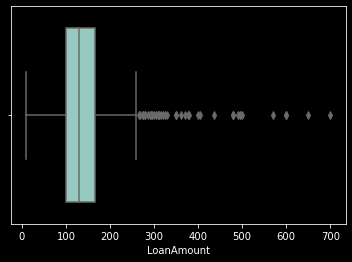

In [102]:
sns.boxplot(x = data['LoanAmount'])

In [103]:
q1 = data['LoanAmount'].quantile(0.25)
q3 = data['LoanAmount'].quantile(0.75)

In [104]:
# iqr -> Inter quantile region
iqr = q3 - q1
iqr

64.5

In [105]:
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

upper_limit , lower_limit

(261.5, 3.5)

In [106]:
def limit_imputer(value) :
    if value > upper_limit :
        return upper_limit
    if value < lower_limit :
        return lower_limit
    else :
        return value

In [107]:
data['LoanAmount'] = data['LoanAmount'].apply(limit_imputer)

In [108]:
data['LoanAmount'].describe()

count    614.000000
mean     138.025354
std       55.773951
min        9.000000
25%      100.250000
50%      129.000000
75%      164.750000
max      261.500000
Name: LoanAmount, dtype: float64

### Splitting the dataset

In [109]:
X = data.drop(columns= ['Loan_Status']).values
Y = data['Loan_Status'].values

In [110]:
from sklearn.model_selection import train_test_split as tts
x_train , x_test , y_train , y_test = tts(X , Y , test_size= 0.2 , random_state= 42)
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((491, 10), (123, 10), (491,), (123,))

### Feature Scaling

In [111]:
from sklearn.preprocessing import StandardScaler
Sc = StandardScaler()
x_train = Sc.fit_transform(x_train)
x_test = Sc.transform(x_test)

### Applying Support Vector Machine

In [112]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear')
classifier.fit(x_train , y_train) 

SVC(kernel='linear')

### Confusion Matrix and Accuracy Score

In [113]:
from sklearn.metrics import confusion_matrix , accuracy_score
y_pred = classifier.predict(x_test)
C_M = confusion_matrix(y_test , y_pred)
print(C_M)
accuracy_score(y_test , y_pred)

[[18 25]
 [ 1 79]]


0.7886178861788617

### Classification Report

In [114]:
from sklearn.metrics import classification_report
Report = classification_report(y_test , y_pred)
print(Report)

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



### Applying k-Fold Cross Validation

In [115]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator= classifier , X = x_train , y = y_train , cv = 50 , n_jobs = -1 , verbose= True)

print("Accuracies : {:.2f} %".format(accuracies.mean() * 100))
print("Standard Deviation : {:.2f} %".format(accuracies.std() * 100))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Accuracies : 81.42 %
Standard Deviation : 10.63 %


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   39.8s finished


### Applying Grid_Search 

In [116]:
from sklearn.model_selection import GridSearchCV
# parameters is the list / dictionary of hyperparameters to be tuned
parameters = [{'C' : [0.0001, 0.001 , 0.01 , 0.1 ,0.25 , 0.5 , 0.75 , 1] , 'kernel' : ['linear']},
              {'C' : [0.01 , 0.1 ,0.25 , 0.5 , 0.75 , 1] , 'kernel' : ['rbf'] , 'gamma' : [0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.6 , 0.7 , 0.8 , 0.9]}]
# Since the kernel : 'linear' has no attribute of gamma , we create two different sets in a dictionary

# {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'},

grid_search = GridSearchCV(estimator= classifier,
                           param_grid= parameters,
                           scoring= 'accuracy',
                           cv = 10,
                           n_jobs=-1)

# Grid Search is applied to the training set only
grid_search.fit(x_train , y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters: ", best_parameters)

Best Accuracy: 81.47 %
Best Parameters:  {'C': 0.01, 'kernel': 'linear'}


### Training the model with the Best Parameters

In [117]:
classifier = SVC(C = 0.01 , kernel= 'linear' , probability= True)
classifier.fit(x_train , y_train)

SVC(C=0.01, kernel='linear', probability=True)

### Coefficient Plot

In [118]:
x = data.drop(columns = ['Loan_Status']).columns
c = classifier.coef_.reshape(-1)

coeff_plot = pd.DataFrame({
                            'coefficients' : c,
                            'variable' : x
                            })

# sorting the values
coeff_plot = coeff_plot.sort_values(by = 'coefficients')
coeff_plot.head(10)

,coefficients,variable
9,-0.000112,Combined_Income
2,-0.000035,Dependents
3,-0.000025,Education
6,-0.000017,Loan_Amount_Term
1,0.000005,Married
5,0.000028,LoanAmount
8,0.000039,Property_Area
0,0.000058,Gender
4,0.000079,Self_Employed
7,0.694144,Credit_History


Text(0.5, 1.0, 'Coefficient Plot')

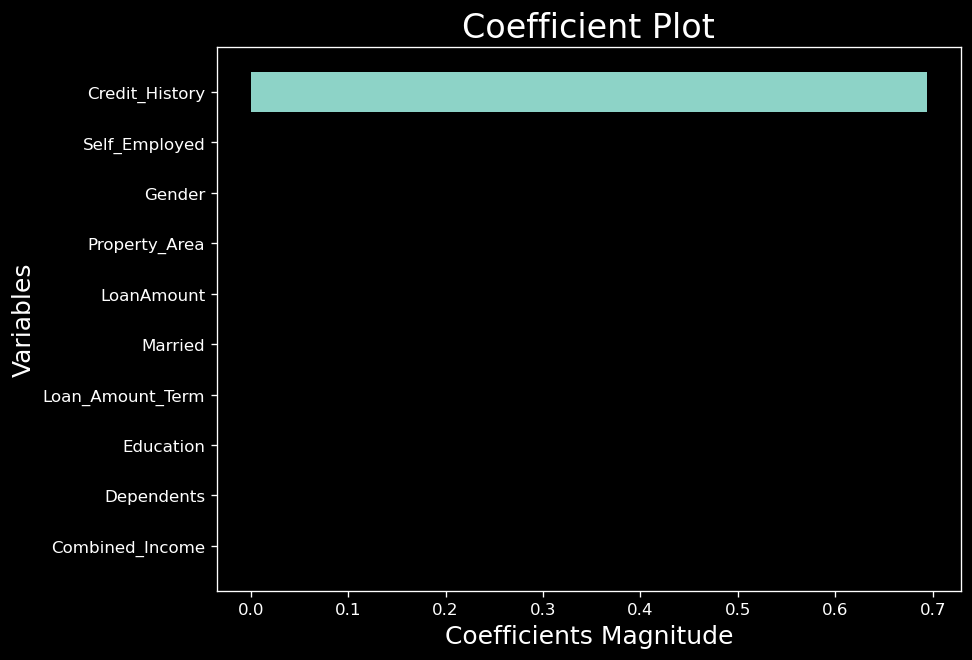

In [119]:
plt.figure(figsize = (8,6) , dpi = 120)
plt.barh(coeff_plot['variable'] , coeff_plot['coefficients'])
plt.xlabel("Coefficients Magnitude" , fontsize = 15)
plt.ylabel("Variables" , fontsize = 15)
plt.title("Coefficient Plot" , fontsize = 20)